In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
series = np.sin((0.1*np.arange(400))**2) # squaring input = changing frequency over time

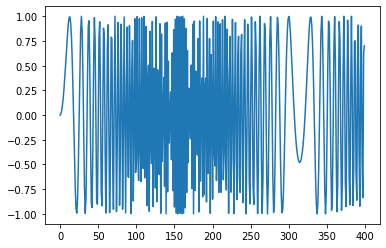

In [ ]:
plt.plot(series)
plt.show()

In [ ]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

# Make it N x T
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X shape", X.shape, "Y shape", Y.shape)

X shape (390, 10) Y shape (390,)


In [ ]:
# Try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01)
)
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:])
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/80
7/7 [==============================] - 1s 27ms/step - loss: 1.7564 - val_loss: 1.0965
Epoch 2/80
7/7 [==============================] - 0s 6ms/step - loss: 1.4476 - val_loss: 0.9920
Epoch 3/80
7/7 [==============================] - 0s 7ms/step - loss: 1.2223 - val_loss: 0.8898
Epoch 4/80
7/7 [==============================] - 0s 7ms/step - loss: 1.0441 - val_loss: 0.8019
Epoch 5/80
7/7 [==============================] - 0s 7ms/step - loss: 0.9092 - val_loss: 0.7273
Epoch 6/80
7/7 [==============================] - 0s 8ms/step - loss: 0.8027 - val_loss: 0.6696
Epoch 7/80
7/7 [==============================] - 0s 6ms/step - loss: 0.7218 - val_loss: 0.6357
Epoch 8/80
7/7 [==============================] - 0s 9ms/step - loss: 0.6645 - val_loss: 0.6213
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6103 - val_loss: 0.6096
Epoch 10/80
7/7 [==============================] - 0s 6ms/step - loss: 0.5754 - val_loss: 0.6005
Epoch 11/80
7/7 [=====================

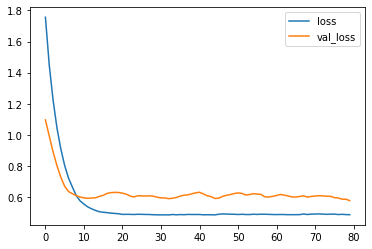

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
# Loss is much higher than before (with normal sine wave)
# But maybe it learns something, since it converges

(390, 1)


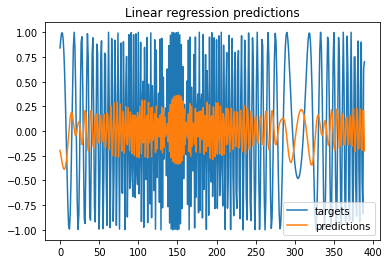

In [ ]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('Linear regression predictions')
plt.legend()
plt.show()
# Doesnt do very well. Doesnt even get values in the right range
# Multi-step forecast will do even worse

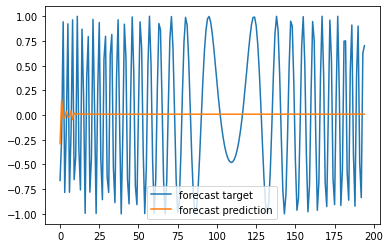

In [ ]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0]
  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
# Now try RNN (remember, reshape input data to NxTxD)
X = X.reshape(-1, T, 1)

i = Input(shape=(T, D))
#x = SimpleRNN(10)(i)
# Try LSTM
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05),
)
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 3s 91ms/step - loss: 0.5287 - val_loss: 0.5600
Epoch 2/200
7/7 [==============================] - 0s 13ms/step - loss: 0.5025 - val_loss: 0.5710
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4123 - val_loss: 0.5298
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3312 - val_loss: 0.5197
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2269 - val_loss: 0.2404
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1982 - val_loss: 0.2588
Epoch 7/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1418 - val_loss: 0.2143
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1258 - val_loss: 0.1265
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0835 - val_loss: 0.0903
Epoch 10/200
7/7 [==============================] - 0s 16ms/step - loss: 0.0502 - val_loss: 0.0860
Epoch 11/200
7/7 [=============

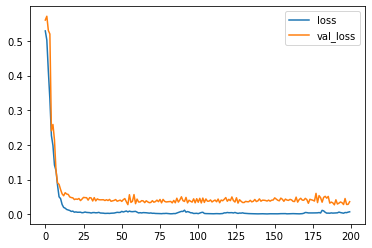

In [ ]:
# RNN should do better since it has the flexibility to match the signal
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

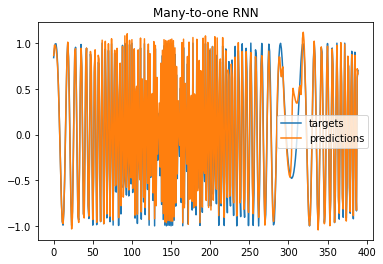

In [ ]:
# One-step forecast
outputs = model.predict(X)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('Many-to-one RNN')
plt.legend()
plt.show()
'''
With RNN:
Looks like it does much better. It can match the frequency in most places,
even if the signal slows down. Values are also in approximately the right range

With LSTM:
Looks a bit better than RNN
'''

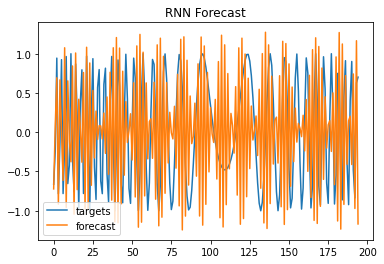

In [ ]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
# With RNN and LSTM, model isnt able to predict properly when signal slows down
# With this dataset, there arent many long-term dependancie (values fasr in the past dont help predict future values)
# So, it makes sense that LSTM has no real advantage over RNN